In [1]:
import pandas as pd 
import numpy as np 
import nltk 
import re
import string
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn import tree

from imblearn.over_sampling import SMOTE
from collections import Counter

from nltk import FreqDist, word_tokenize

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import collections, numpy

In [3]:
df= pd.read_csv('fear.csv') 

In [4]:
print("Missing dataset value in all : ",df.isnull().values.any())

Missing dataset value in all :  True


In [5]:
df.head()

,label,tweet
0,fear,Hari ini jadwal presentasi proker di LPPM karn...
1,fear,Drama kmarin sore : seharian puasa trus pas lg...
2,fear,"Ya tau kalo rasa sakit hati memamg sulit, tapi..."
3,fear,Apa hukumnya bermain musik stad? jelas HAROOOO...
4,fear,Nah.... Yg saya takutkan itu mas. Nanti di tum...


In [6]:
df.shape

(2308, 2)

In [7]:
print('Jumlah kolom pada dataset:  ', len(df.columns))
print('Jumlah baris pada dataset:  ', len(df))

Jumlah kolom pada dataset:   2
Jumlah baris pada dataset:   2308


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


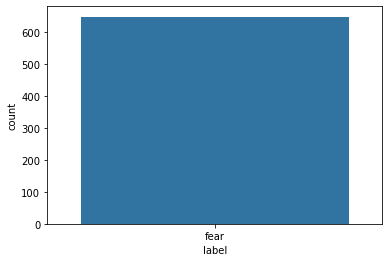

In [8]:
sns.countplot(df['label'],label="Count") #Grafik pada kolom label
plt.show() 

In [9]:
collections.Counter(df['label'])

Counter({'fear': 649, nan: 1659})

In [10]:
df['tweet'][21]

'Jd kaya kebalik gitu. Dulu socmed jd escape buat gue ekspresiin kegilaan. Skrg berhubung socmed jd lebih serem dr dunia nyata, eh jd dunia nyata yg gue jadiin escape dari socmed.'

In [11]:
def case_folding(tweet):  
    tweet = str(tweet).lower()
    return tweet
df['tweet']= df['tweet'].apply(case_folding)  

In [12]:
df.head()

,label,tweet
0,fear,hari ini jadwal presentasi proker di lppm karn...
1,fear,drama kmarin sore : seharian puasa trus pas lg...
2,fear,"ya tau kalo rasa sakit hati memamg sulit, tapi..."
3,fear,apa hukumnya bermain musik stad? jelas haroooo...
4,fear,nah.... yg saya takutkan itu mas. nanti di tum...


In [13]:
def clean_tweet(tweet):
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', ' ', tweet)
    
    # remove number
    tweet = re.sub(r'[0-9]+', '', tweet)
    
    #remove url 
    tweet = re.sub("url", "", tweet)
    
    #remove username 
    tweet = re.sub('username', '', tweet)
    
    #remove sensitiveno
    tweet = re.sub('sensitiveno', '', tweet)
    
    #remove URL 
    tweet = re.sub("https", "", tweet)
    
    # remove askfm
    tweet = re.sub('askfm', '', tweet)
    
    #remove double spasi
    tweet= " ".join(tweet.split())    
    return tweet
df['tweet']= df['tweet'].apply(clean_tweet)

In [15]:
df.head()

,label,tweet
0,fear,hari ini jadwal presentasi proker di lppm karn...
1,fear,drama kmarin sore seharian puasa trus pas lg m...
2,fear,ya tau kalo rasa sakit hati memamg sulit tapi ...
3,fear,apa hukumnya bermain musik stad jelas haroooom...
4,fear,nah yg saya takutkan itu mas nanti di tumpangi...


In [16]:
key_norm = pd.read_csv('kamus_normalisasi.csv')

def normalisasi(tweet):
    tweet = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] 
                      if (key_norm["singkat"] == word).any() else word for word in tweet.split()])
    return tweet
df['tweet']= df['tweet'].apply(normalisasi)

In [17]:
df.head()

,label,tweet
0,fear,hari ini jadwal presentasi proker di lppm kare...
1,fear,drama kemarin sore seharian puasa terus pas la...
2,fear,ya tahu kalau rasa sakit hati memamg sulit tap...
3,fear,apa hukumnya bermain musik stad jelas haroooom...
4,fear,nah yang saya takutkan itu mas nanti di tumpan...


In [18]:
df.head()

,label,tweet
0,fear,hari ini jadwal presentasi proker di lppm kare...
1,fear,drama kemarin sore seharian puasa terus pas la...
2,fear,ya tahu kalau rasa sakit hati memamg sulit tap...
3,fear,apa hukumnya bermain musik stad jelas haroooom...
4,fear,nah yang saya takutkan itu mas nanti di tumpan...


In [29]:
text = df['tweet'].values
y = df['label'].values
teks = ' '.join(text)
kata = nltk.tokenize.word_tokenize(teks)
fdist = FreqDist(kata)
top_words = fdist.most_common()
print(top_words)

[('nan', 1662), ('aku', 661), ('yang', 460), ('takut', 430), ('tidak', 364), ('di', 263), ('dan', 234), ('kalau', 227), ('ada', 198), ('ini', 185), ('tapi', 183), ('ya', 178), ('sudah', 178), ('itu', 166), ('jadi', 158), ('saja', 149), ('sama', 146), ('masih', 140), ('banget', 130), ('mau', 123), ('nya', 121), ('karena', 120), ('saya', 120), ('orang', 120), ('ke', 115), ('lagi', 113), ('bisa', 113), ('terus', 108), ('begitu', 108), ('juga', 108), ('dia', 108), ('dari', 93), ('pas', 92), ('apa', 88), ('sampai', 86), ('sih', 78), ('dengan', 77), ('seram', 75), ('hanya', 74), ('tahu', 70), ('akan', 70), ('kan', 67), ('kita', 66), ('teman', 64), ('bagaimana', 61), ('seperti', 61), ('untuk', 60), ('sendiri', 58), ('banyak', 58), ('atau', 57), ('memang', 57), ('salah', 55), ('pernah', 53), ('sakit', 50), ('lihat', 50), ('bahkan', 49), ('kamu', 49), ('rumah', 48), ('pakai', 47), ('tuh', 46), ('lebih', 45), ('harus', 45), ('jangan', 44), ('nanti', 44), ('kenapa', 43), ('baru', 42), ('tiba', 42

In [24]:
print(fdist.tabulate(50))

      nan       aku      yang     takut     tidak        di       dan     kalau       ada       ini      tapi        ya     sudah       itu      jadi      saja      sama     masih    banget       mau       nya    karena      saya     orang        ke      lagi      bisa     terus    begitu      juga       dia      dari       pas       apa    sampai       sih    dengan     seram     hanya      tahu      akan       kan      kita     teman bagaimana   seperti     untuk   sendiri    banyak      atau 
     1662       661       460       430       364       263       234       227       198       185       183       178       178       166       158       149       146       140       130       123       121       120       120       120       115       113       113       108       108       108       108        93        92        88        86        78        77        75        74        70        70        67        66        64        61        61        60        58        58        57

In [25]:
print("kata frek tertinggi ", fdist.max()," = ", fdist[fdist.max()])

kata frek tertinggi  nan  =  1662


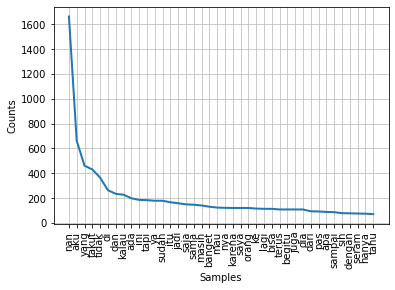

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
fdist.plot(40,cumulative=False)

In [ ]:
 aku 